In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
data=pd.read_csv(r'D:\Kevin\Diabetes\diabetes.csv')

In [2]:
 
X=data[data.columns[0:-1]]
#del(X['SkinThickness'])
#del(X['BloodPressure'])
#del(X['Pregnancies'])
#del(X['Insulin'])
#del(X['DiabetesPedigreeFunction'])
#del(X['Glucose'])
Y=data[data.columns[-1]]
# create a helper function

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.772


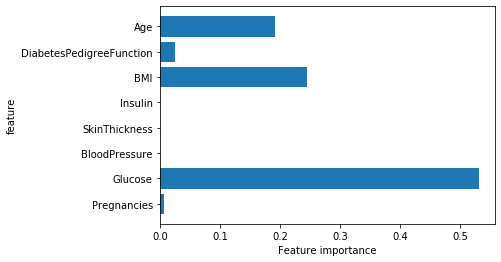

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_importance_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(tree)

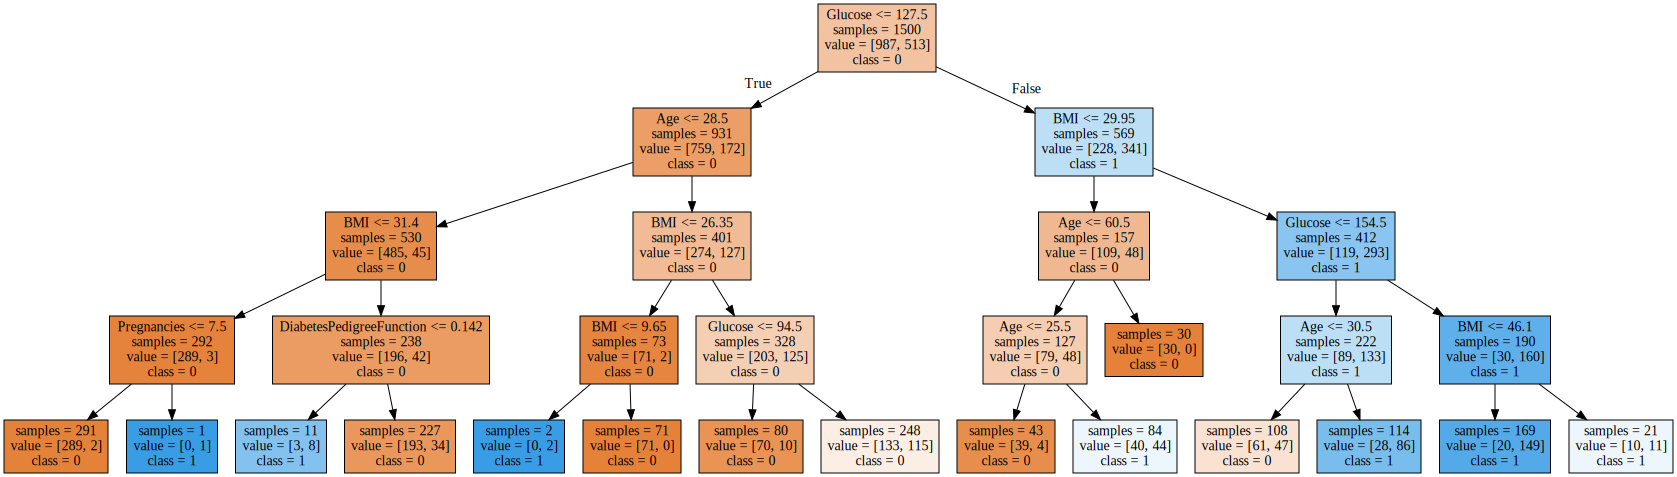

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="diabetes_census_tree.dot",class_names=["0","1"],
feature_names=X.columns,impurity=False,filled=True)
import graphviz
with open("diabetes_census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'v', '^', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='v',
                    s=55, label='test set')

In [8]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [9]:
X = data[['Glucose','BMI']]

In [10]:
X

,Glucose,BMI
0,138,33.6
1,84,38.2
2,145,44.2
3,135,42.3
4,139,40.7
5,173,46.5
6,99,25.6
7,194,26.1
8,83,36.8
9,89,33.5


In [11]:
y=data['Outcome']

In [12]:
y

0       1
1       0
2       1
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      1
29      0
       ..
1970    0
1971    0
1972    0
1973    1
1974    0
1975    1
1976    1
1977    0
1978    0
1979    0
1980    1
1981    0
1982    0
1983    0
1984    0
1985    1
1986    1
1987    0
1988    0
1989    0
1990    0
1991    1
1992    1
1993    0
1994    0
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
from sklearn import svm
machine1 = svm.SVC(kernel = 'linear')
machine1.fit(X_train,y_train)
y_pred = machine1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7516666666666667

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


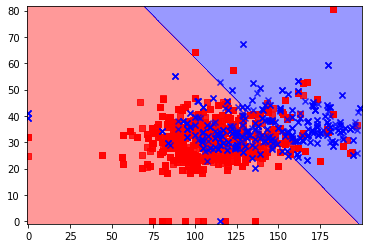

In [17]:
plot_decision_regions(X_train, y_train, machine1)
plt.show()

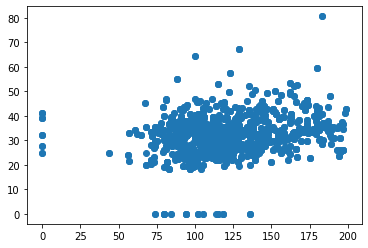

In [15]:
plt.scatter(np.array(X)[:,0],np.array(X)[:,1])
plt.show()

In [16]:
machine2 = svm.SVC(kernel = 'rbf')
machine2.fit(X_train,y_train)
y_pred2 = machine2.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
accuracy_score(y_test, y_pred2)

0.88

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},{'clf__C': param_range,'clf__gamma': param_range,'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [19]:
>>> clf = gs.best_estimator_
>>> clf.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.927


In [26]:
Prediction = machine1.predict([[130,30]])
Prediction[0]

0

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
data.loc[data['Outcome']== 2,'Outcome'] = 1
import matplotlib.pyplot as plt

In [28]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [29]:
diabetes = data.loc[(data['Outcome'] != 0) & (data['Pregnancies'] >= 10)]

Text(0, 0.5, 'Number of Records')

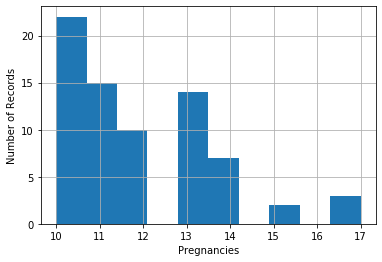

In [30]:
diabetes.loc[diabetes['Outcome'] == 1, 'Pregnancies'].hist()
plt.xlabel('Pregnancies')
plt.ylabel('Number of Records')

In [32]:
import pandas
diabetes = pandas.read_csv(r'C:\Users\Admin\Desktop\diabetes.csv', na_values=['NA'])

In [33]:
diabetes.loc[(diabetes['Outcome']==0) & (diabetes['Pregnancies'] <10) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0
10,4,99,68,38,0,32.8,0.145,33,0
12,3,80,0,0,0,0.0,0.174,22,0
13,6,166,74,0,0,26.6,0.304,66,0


Text(0, 0.5, 'Number of Records')

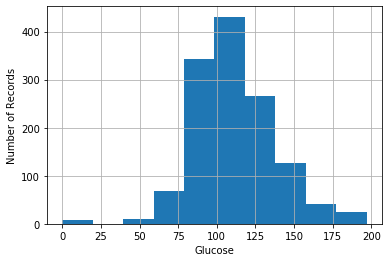

In [34]:
diabetes.loc[diabetes['Outcome'] == 0, 'Glucose'].hist()
import matplotlib.pyplot as plt
plt.xlabel('Glucose')
plt.ylabel('Number of Records')

Text(0, 0.5, 'Number of Records')

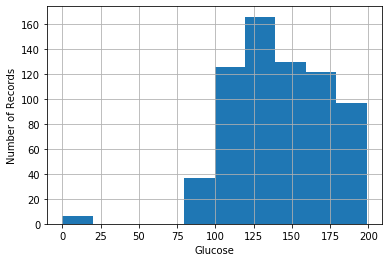

In [35]:
diabetes.loc[diabetes['Outcome']==1, 'Glucose'].hist()
plt.xlabel('Glucose')
plt.ylabel('Number of Records')

In [36]:
truediabetes= diabetes.loc[diabetes['Outcome']==1]

In [37]:
truediabetes.mean()

Pregnancies                   4.732456
Glucose                     141.568713
BloodPressure                71.166667
SkinThickness                22.633041
Insulin                      98.897661
BMI                          35.320468
DiabetesPedigreeFunction      0.540681
Age                          36.956140
Outcome                       1.000000
dtype: float64

In [38]:
falsediabetes= diabetes.loc[diabetes['Outcome']==0]

In [39]:
falsediabetes.mean()

Pregnancies                   3.168693
Glucose                     110.586626
BloodPressure                68.094985
SkinThickness                20.052432
Insulin                      70.563830
BMI                          30.567477
DiabetesPedigreeFunction      0.434676
Age                          31.081307
Outcome                       0.000000
dtype: float64

In [40]:
diabetes.loc[(diabetes['Outcome']==0,'SkinThickness')]

1       31
4       41
5       32
6       17
7        0
8       28
9       30
10      38
12       0
13       0
14       0
15      15
17      32
18      19
19      32
21      25
22      39
23       0
25      23
26      23
27       0
29      17
30       0
31       0
32      19
34      31
35      33
36       0
40      25
41       0
        ..
1959     0
1960    29
1961     0
1962    30
1963    26
1965    31
1966    23
1967    37
1968    35
1969     0
1970    17
1971    50
1972     0
1974    42
1977    15
1978    21
1979    19
1981    38
1982    40
1983    34
1984    23
1987    25
1988     0
1989     0
1990    12
1993    23
1994    42
1995    24
1997     0
1999    15
Name: SkinThickness, Length: 1316, dtype: int64

In [41]:
clean_data=pandas.read_csv(r'C:\Users\Admin\Desktop\diabetes.csv')

In [42]:
clean_data.loc[clean_data['Outcome']== 2,'Outcome'] = 1
averageBloodPressure=clean_data.loc[(clean_data['Outcome']==0,'BloodPressure')].mean()
clean_data.loc[clean_data['BloodPressure']==0,'BloodPressure'] = averageBloodPressure
averageSkinThickness=clean_data.loc[(clean_data['Outcome']==0,'SkinThickness')].mean()
clean_data.loc[clean_data['SkinThickness']==0,'SkinThickness'] = averageSkinThickness
averageInsulin=clean_data.loc[(clean_data['Outcome']==0,'Insulin')].mean()
clean_data.loc[clean_data['Insulin']==0,'Insulin'] = averageInsulin
averageBMI=clean_data.loc[(clean_data['Outcome']==0,'BMI')].mean()
clean_data.loc[clean_data['BMI']==0,'BMI'] = averageBMI
averageBloodPressure=clean_data.loc[(clean_data['Outcome']==1,'BloodPressure')].mean()
clean_data.loc[clean_data['BloodPressure']==0,'BloodPressure'] = averageBloodPressure
averageSkinThickness=clean_data.loc[(clean_data['Outcome']==1,'SkinThickness')].mean()
clean_data.loc[clean_data['SkinThickness']==0,'SkinThickness'] = averageSkinThickness
averageInsulin=clean_data.loc[(clean_data['Outcome']==1,'Insulin')].mean()
clean_data.loc[clean_data['Insulin']==0,'Insulin'] = averageInsulin
averageBMI=clean_data.loc[(clean_data['Outcome']==1,'BMI')].mean()
clean_data.loc[clean_data['BMI']==0,'BMI'] = averageBMI

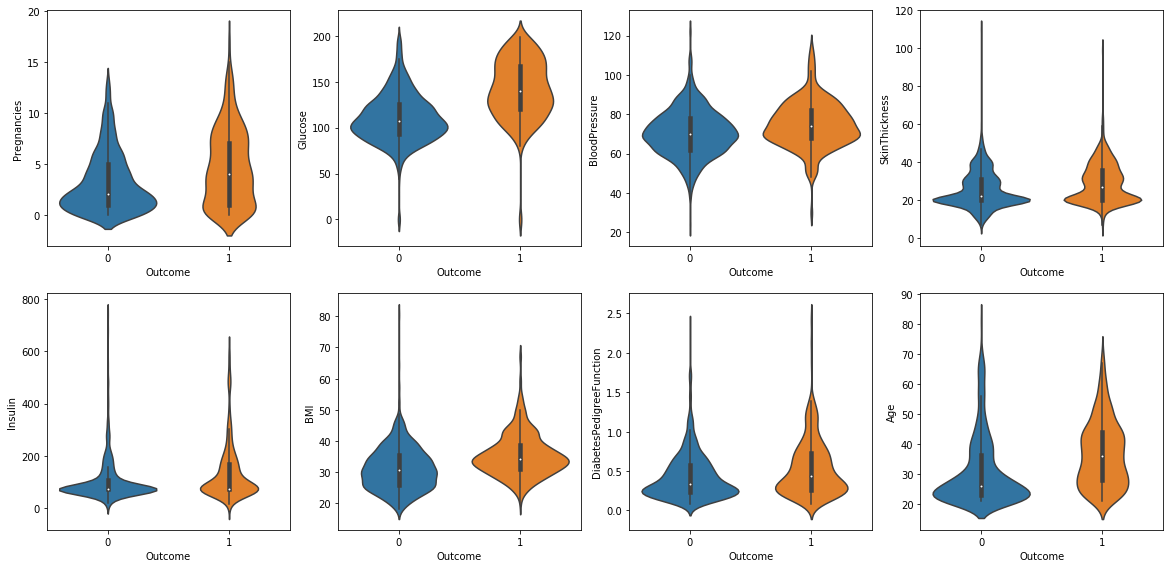

In [43]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(clean_data.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.violinplot(x='Outcome', y=column, data=clean_data)

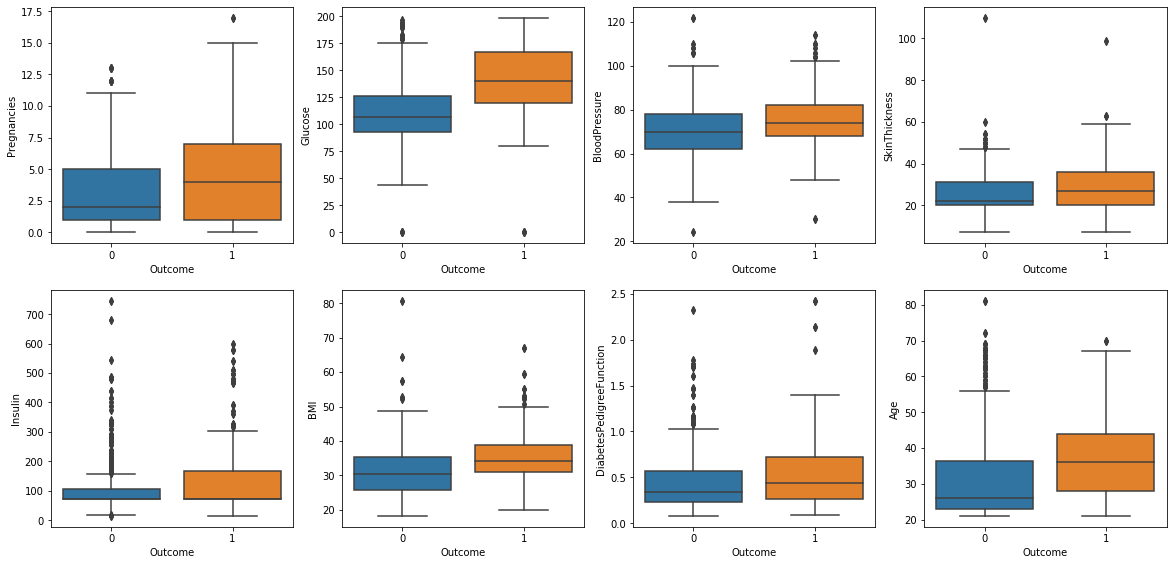

In [44]:
plt.figure(figsize=(20,20))

for column_index, column in enumerate(clean_data.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sb.boxplot(x='Outcome', y=column, data=clean_data)